### Importing and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [2]:
csv_dir = 'C://Users//Bavana Pasupuleti//Downloads//archive (1)//harth'
csv_files = glob.glob(os.path.join(csv_dir, '*.csv'))


In [3]:
# Read each CSV file and append to the list
df_list=[]
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

In [4]:
full_df = pd.concat(df_list, ignore_index=True)
full_df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,NaN,NaN
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,NaN,NaN
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,NaN,NaN
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,NaN,NaN
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,NaN,NaN


### Handling Missing Values

<Axes: >

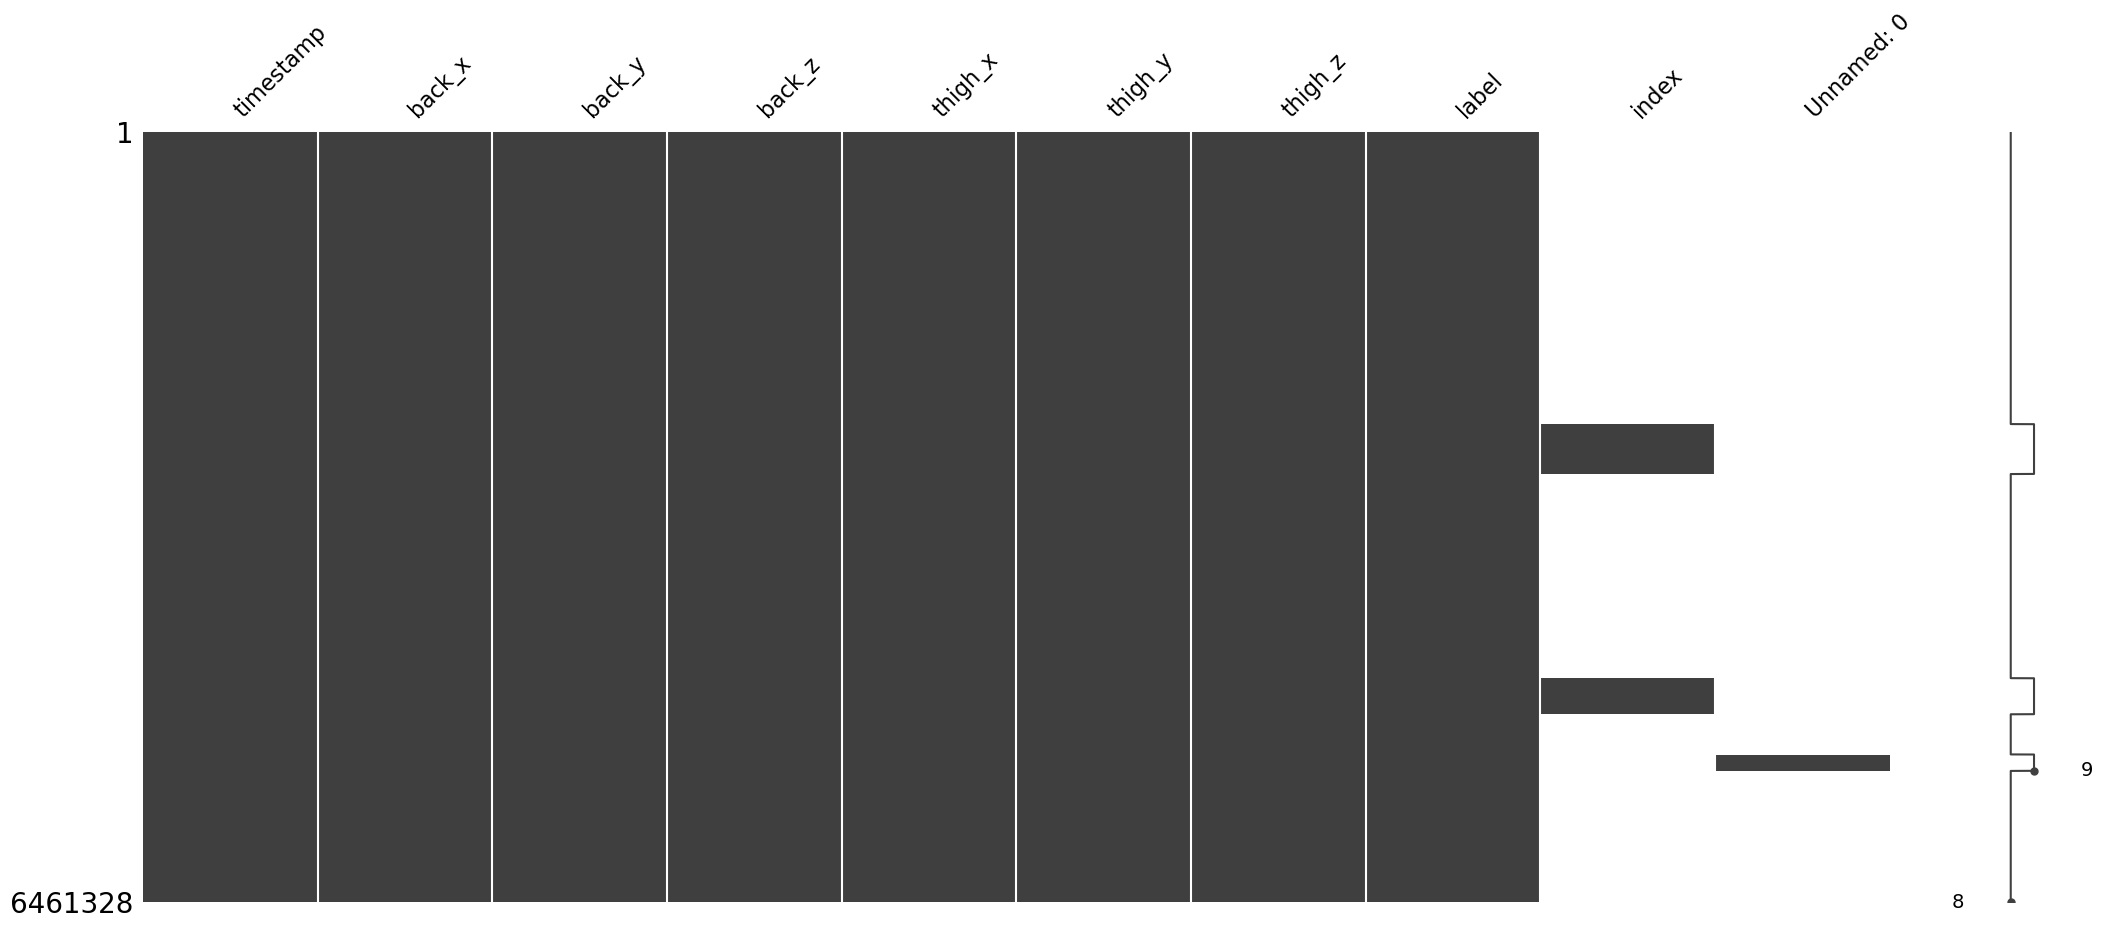

In [5]:
import missingno as msno
msno.matrix(full_df)

In [6]:
#columns with null values
print('Data columns with null values:',full_df.isnull().sum(), sep = '\n')
print(full_df.columns)

Data columns with null values:
timestamp           0
back_x              0
back_y              0
back_z              0
thigh_x             0
thigh_y             0
thigh_z             0
label               0
index         5740689
Unnamed: 0    6323682
dtype: int64
Index(['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y',
       'thigh_z', 'label', 'index', 'Unnamed: 0'],
      dtype='object')


In [7]:
#dropping columns with null values
full_df.drop(['Unnamed: 0','index'], axis = 1,inplace=True)
full_df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6


<Axes: >

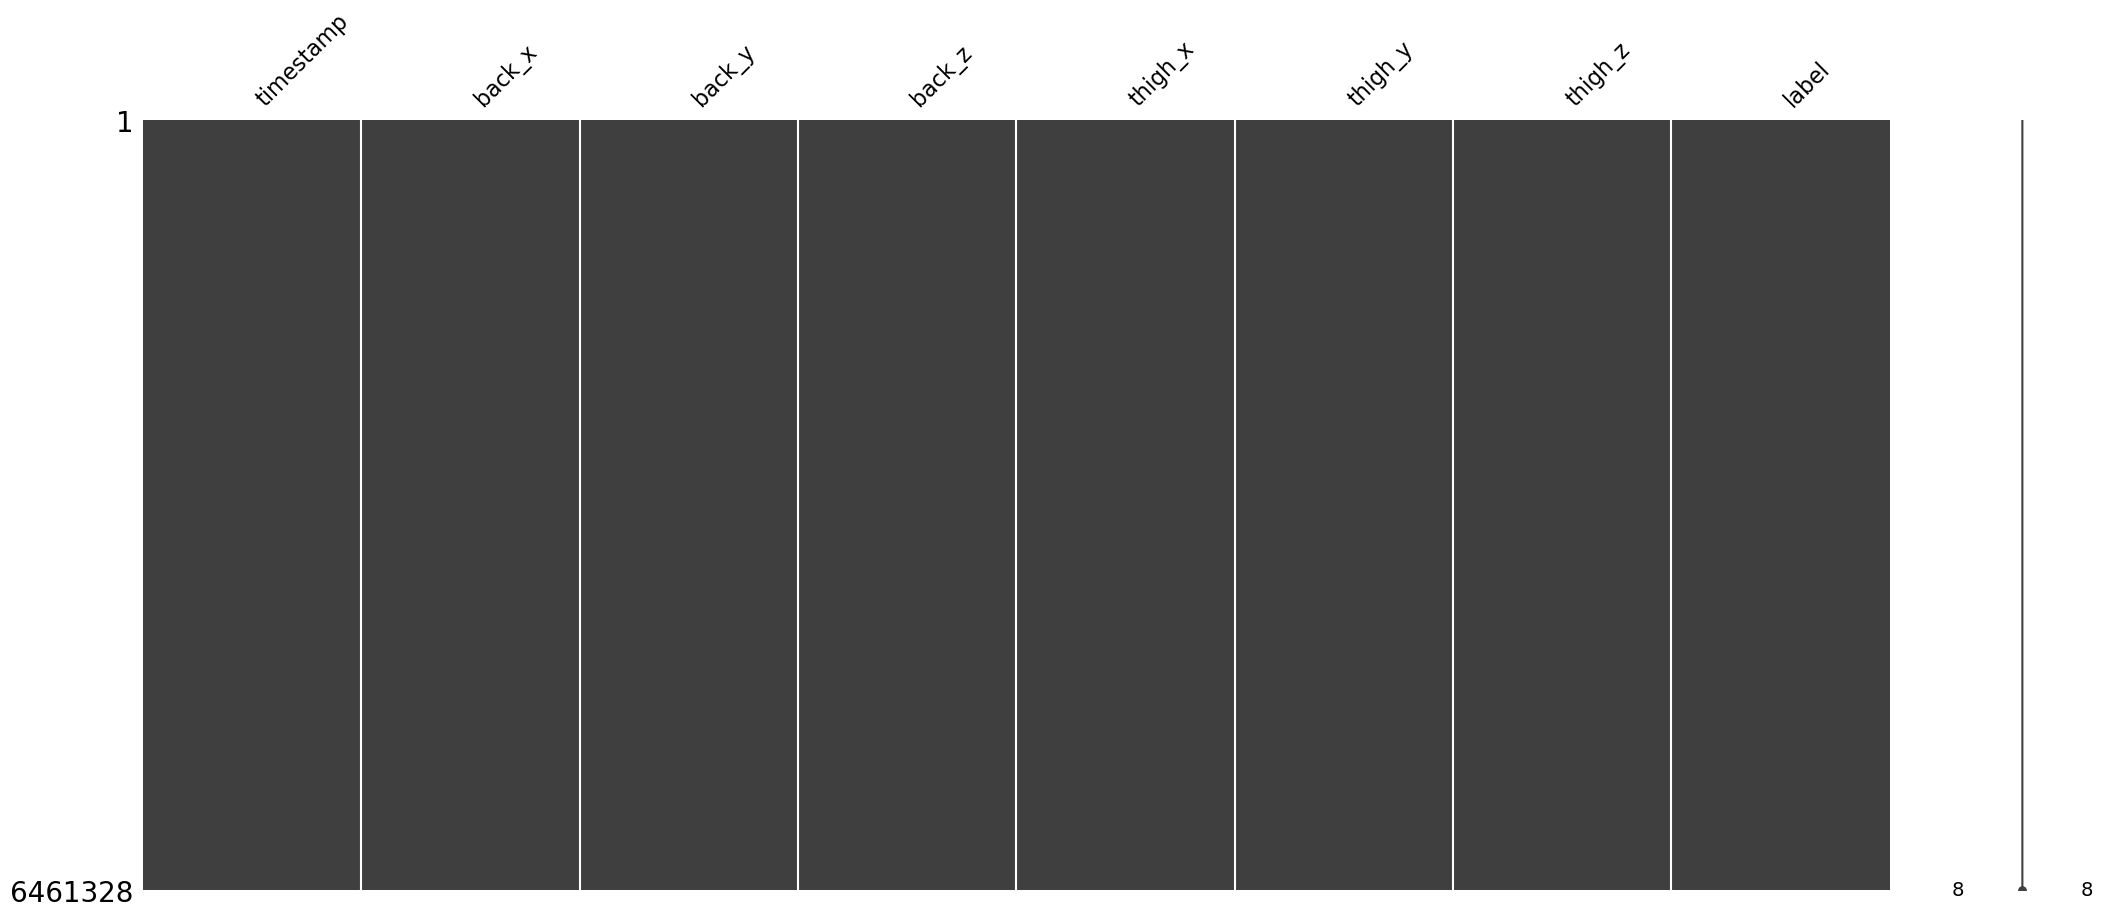

In [9]:
msno.matrix(full_df)

In [8]:
full_df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6


In [9]:
og_df=full_df
og_df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...,...
6461323,2019-01-12 00:59:56.940,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3
6461324,2019-01-12 00:59:56.960,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3
6461325,2019-01-12 00:59:56.980,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3
6461326,2019-01-12 00:59:57.000,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3


In [10]:
full_df2=full_df
activity_labels = {
    1: 'walking',
    2: 'running',
    3: 'shuffling',
    4: 'stairs (ascending)',
    5: 'stairs (descending)',
    6: 'standing',
    7: 'sitting',
    8: 'lying',
    13: 'cycling (sit)',
    14: 'cycling (stand)',
    130: 'cycling (sit, inactive)',
    140: 'cycling (stand, inactive)'
}
full_df2['label'] = full_df['label'].map(activity_labels)


### Pie chart of all Label distributions

In [11]:
#checking for value counts
full_df2['label'].value_counts()

label
sitting                      2902703
walking                      1197155
standing                      743480
lying                         428898
cycling (sit)                 393963
running                       291356
shuffling                     254839
stairs (ascending)             76217
stairs (descending)            67253
cycling (stand)                55814
cycling (sit, inactive)        41785
cycling (stand, inactive)       7865
Name: count, dtype: int64

In [12]:
#caluculating percentage of each activity
activity_counts = full_df2['label'].value_counts(normalize=True) * 100

activity_counts = pd.Series({
    'sitting': 44.924248,
    'walking': 18.528002,
    'standing': 11.506613,
    'lying': 6.637923,
    'cycling (sit)': 6.097245,
    'running': 4.509228,
    'shuffling': 3.944065,
    'stairs (ascending)': 1.179587,
    'stairs (descending)': 1.040854,
    'cycling (stand)': 0.863816,
    'cycling (sit, inactive)': 0.646694,
    'cycling (stand, inactive)': 0.121724
})

activity_labels = {
    1: 'walking',
    2: 'running',
    3: 'shuffling',
    4: 'stairs (ascending)',
    5: 'stairs (descending)',
    6: 'standing',
    7: 'sitting',
    8: 'lying',
    13: 'cycling (sit)',
    14: 'cycling (stand)',
    130: 'cycling (sit, inactive)',
    140: 'cycling (stand, inactive)'
}

# Reindex activity_counts to match the order of activity_labels
activity_counts_reordered = activity_counts.reindex(activity_labels.values())
activity_names = activity_counts_reordered.index.map(activity_labels)
print(activity_counts,activity_names)
print(type(activity_counts),type(activity_names),type(activity_labels))

sitting                      44.924248
walking                      18.528002
standing                     11.506613
lying                         6.637923
cycling (sit)                 6.097245
running                       4.509228
shuffling                     3.944065
stairs (ascending)            1.179587
stairs (descending)           1.040854
cycling (stand)               0.863816
cycling (sit, inactive)       0.646694
cycling (stand, inactive)     0.121724
dtype: float64 Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype='float64')
<class 'pandas.core.series.Series'> <class 'pandas.core.indexes.base.Index'> <class 'dict'>


In [13]:

print(activity_counts)
print(activity_labels)

sitting                      44.924248
walking                      18.528002
standing                     11.506613
lying                         6.637923
cycling (sit)                 6.097245
running                       4.509228
shuffling                     3.944065
stairs (ascending)            1.179587
stairs (descending)           1.040854
cycling (stand)               0.863816
cycling (sit, inactive)       0.646694
cycling (stand, inactive)     0.121724
dtype: float64
{1: 'walking', 2: 'running', 3: 'shuffling', 4: 'stairs (ascending)', 5: 'stairs (descending)', 6: 'standing', 7: 'sitting', 8: 'lying', 13: 'cycling (sit)', 14: 'cycling (stand)', 130: 'cycling (sit, inactive)', 140: 'cycling (stand, inactive)'}


In [14]:
import pandas as pd

# Example activity_counts and activity_labels
activity_counts = pd.Series({
    'sitting': 44.924248,
    'walking': 18.528002,
    'standing': 11.506613,
    'lying': 6.637923,
    'cycling (sit)': 6.097245,
    'running': 4.509228,
    'shuffling': 3.944065,
    'stairs (ascending)': 1.179587,
    'stairs (descending)': 1.040854,
    'cycling (stand)': 0.863816,
    'cycling (sit, inactive)': 0.646694,
    'cycling (stand, inactive)': 0.121724
})

activity_labels = {
    1: 'walking',
    2: 'running',
    3: 'shuffling',
    4: 'stairs (ascending)',
    5: 'stairs (descending)',
    6: 'standing',
    7: 'sitting',
    8: 'lying',
    13: 'cycling (sit)',
    14: 'cycling (stand)',
    130: 'cycling (sit, inactive)',
    140: 'cycling (stand, inactive)'
}

# Reindex activity_counts to match the order of activity_labels
activity_counts_reordered = activity_counts.reindex(activity_labels.values())

print("Reordered Activity Counts:")
print(activity_counts_reordered)
print(activity_labels)
#activity_names = activity_counts_reordered.index.map(activity_labels)
#print(activity_names)
activity_names_list = [
    'walking',
    'running',
    'shuffling',
    'stairs (ascending)',
    'stairs (descending)',
    'standing',
    'sitting',
    'lying',
    'cycling (sit)',
    'cycling (stand)',
    'cycling (sit, inactive)',
    'cycling (stand, inactive)'
]

# Create a pandas Index object
activity_names_index = pd.Index(activity_names_list)

# Print the pandas Index object
print(activity_names_index)

Reordered Activity Counts:
walking                      18.528002
running                       4.509228
shuffling                     3.944065
stairs (ascending)            1.179587
stairs (descending)           1.040854
standing                     11.506613
sitting                      44.924248
lying                         6.637923
cycling (sit)                 6.097245
cycling (stand)               0.863816
cycling (sit, inactive)       0.646694
cycling (stand, inactive)     0.121724
dtype: float64
{1: 'walking', 2: 'running', 3: 'shuffling', 4: 'stairs (ascending)', 5: 'stairs (descending)', 6: 'standing', 7: 'sitting', 8: 'lying', 13: 'cycling (sit)', 14: 'cycling (stand)', 130: 'cycling (sit, inactive)', 140: 'cycling (stand, inactive)'}
Index(['walking', 'running', 'shuffling', 'stairs (ascending)',
       'stairs (descending)', 'standing', 'sitting', 'lying', 'cycling (sit)',
       'cycling (stand)', 'cycling (sit, inactive)',
       'cycling (stand, inactive)'],
      dtyp

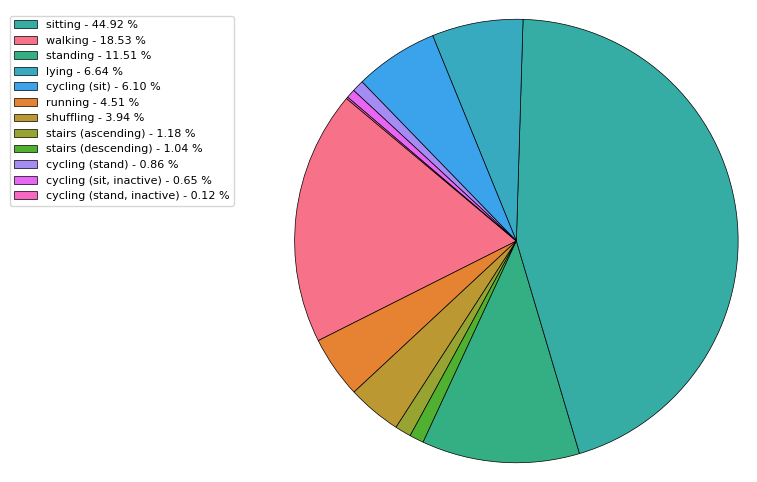

In [15]:

# Calculate percentage of each activity

# Define custom color palette
custom_palette = sns.color_palette("husl", len(activity_counts_reordered))

# Create pie chart
plt.figure(figsize=(10, 6))
patches, texts = plt.pie(activity_counts_reordered, labels=None, colors=custom_palette, startangle=140, radius=1.2,wedgeprops={'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True,"edgecolor":"k"})
labels= ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(activity_names_index, activity_counts_reordered)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, activity_counts_reordered),
                                          key=lambda activity_names_index: activity_names_index[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


### Data Visualisation

### Histogram of each column

A histogram is a type of representation for contionus data. Here we use bins(range) and drop data into these bins. We can customise these bins as to number of bins, bin range etc. Alpha is a parameter we use for transparency. For plotting a histogram we can use df.plot.hist as well as plt.hist(df) both of which will yield the same result, but one is from pandas whereas one is from matplotlib.

<Axes: ylabel='Frequency'>

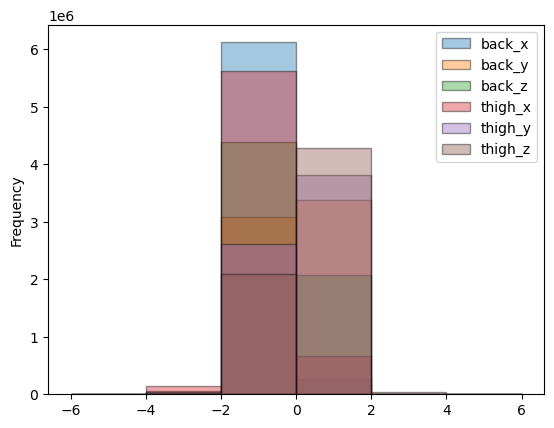

In [8]:
bins=[-6,-4,-2,0,2,4,6]
bins1=[-5.0,5,10,20]
full_df.plot.hist(bins=bins,alpha=0.4,edgecolor='black') 


In [ ]:
#plt.hist(df)

In [68]:
temp_df.head()


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,back_x_smoothed,back_y_smoothed,back_z_smoothed,thigh_x_smoothed,thigh_y_smoothed,thigh_z_smoothed
0,0.703455,0.426609,0.613294,0.181707,0.481255,0.530862,standing,0.705334,0.420117,0.592593,0.385864,0.492372,0.501191
1,0.725814,0.424971,0.600355,0.556293,0.517861,0.508362,standing,0.705736,0.417155,0.587741,0.402845,0.491464,0.494282
2,0.663551,0.416125,0.557949,0.497792,0.495021,0.456216,standing,0.706811,0.412095,0.580698,0.424702,0.490672,0.483910
3,0.714286,0.400405,0.567765,0.402866,0.440477,0.474140,standing,0.707423,0.406532,0.574810,0.439862,0.491449,0.474585
4,0.742824,0.394070,0.562615,0.465790,0.508732,0.447770,standing,0.704674,0.402315,0.572012,0.445679,0.494198,0.469255


array([[<Axes: title={'center': 'back_x'}>,
        <Axes: title={'center': 'back_y'}>],
       [<Axes: title={'center': 'back_z'}>,
        <Axes: title={'center': 'thigh_x'}>],
       [<Axes: title={'center': 'thigh_y'}>,
        <Axes: title={'center': 'thigh_z'}>]], dtype=object)

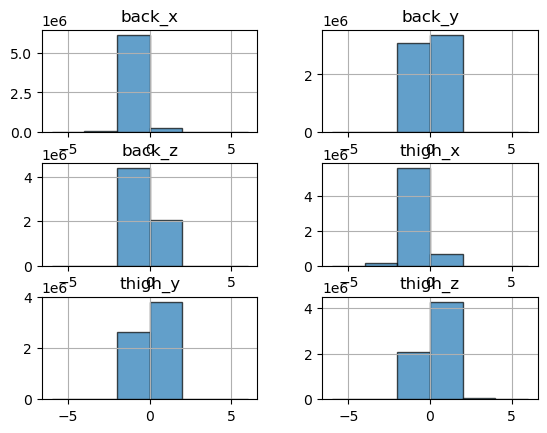

In [9]:
full_df.hist(bins=bins,alpha=0.7,edgecolor='black')

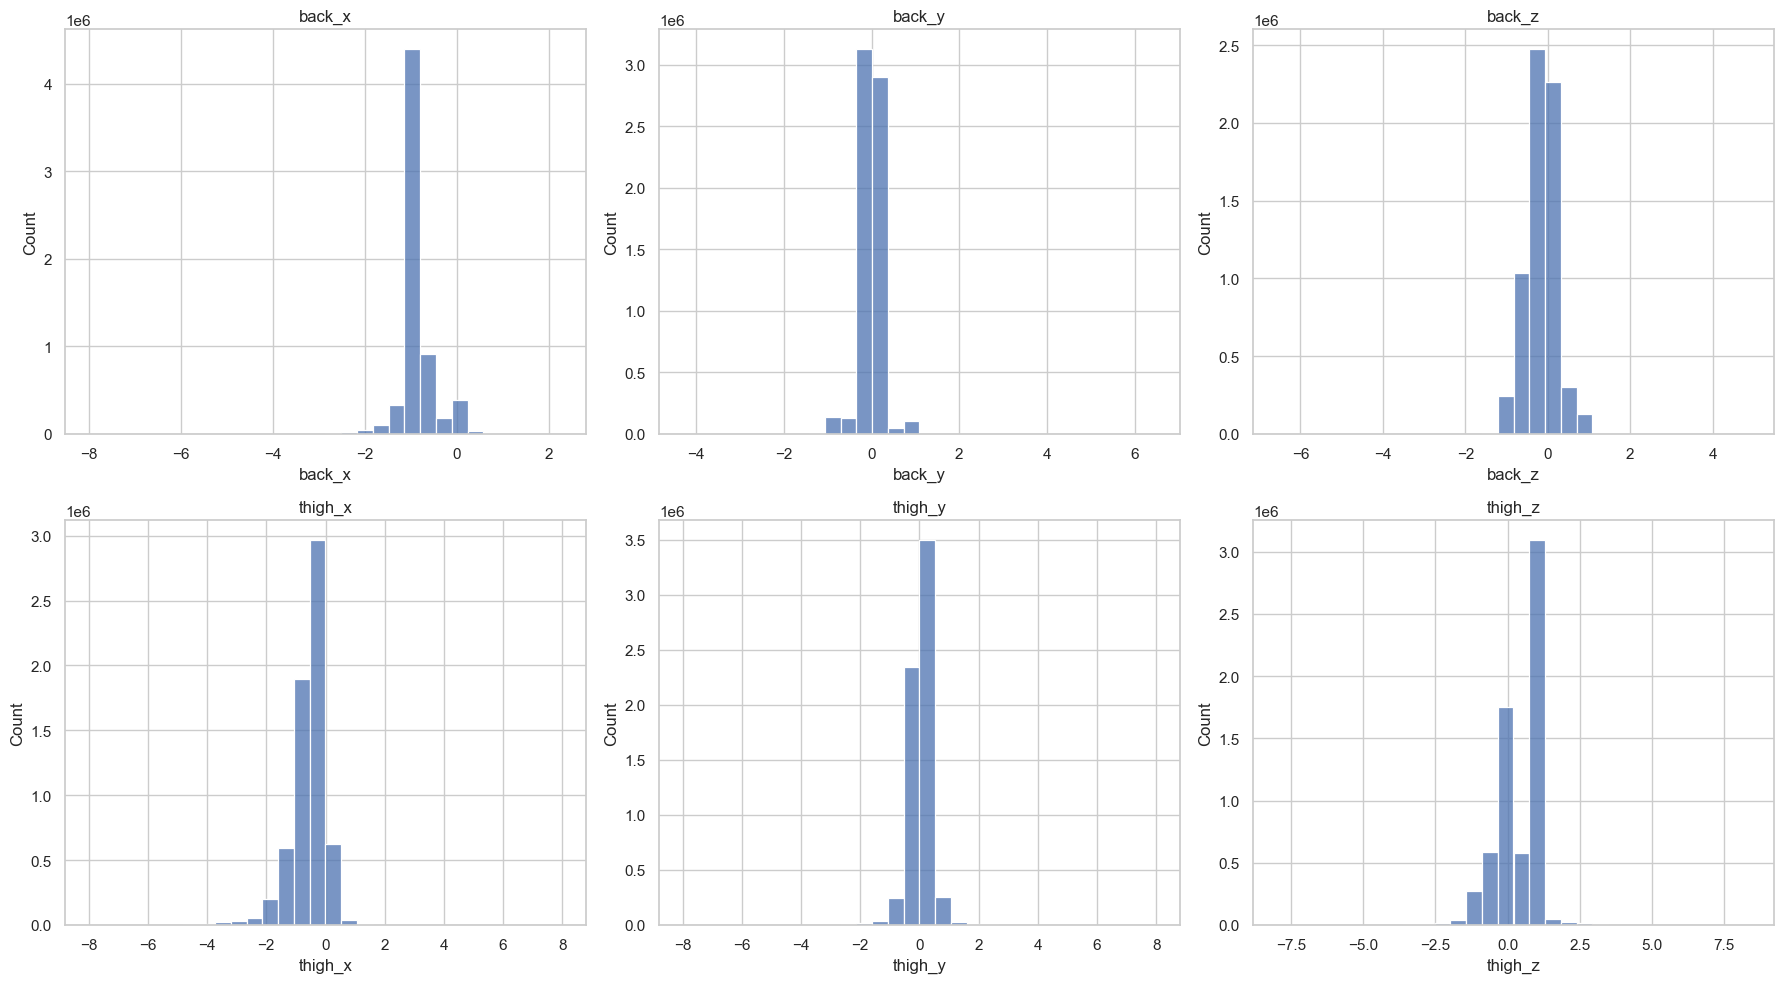

In [18]:
import warnings

# Suppress the FutureWarnings temporarily
warnings.filterwarnings("ignore", category=FutureWarning)

# Your plotting code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (assuming you have loaded full_df with the relevant data)
# full_df = pd.read_csv('your_data.csv')

# Replace infinite values with NaNs and drop any rows with NaNs
full_df.replace([np.inf, -np.inf], np.nan, inplace=True)
full_df.dropna(inplace=True)

# Set the style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# List of columns to plot
columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

# Plot each histogram in a separate subplot
for i, col in enumerate(columns):
    sns.histplot(full_df[col], bins=30, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Re-enable the warnings after plotting
warnings.filterwarnings("default", category=FutureWarning)


### Pair Plot

C:\Users\Bavana Pasupuleti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavana Pasupuleti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavana Pasupuleti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavana Pasupuleti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

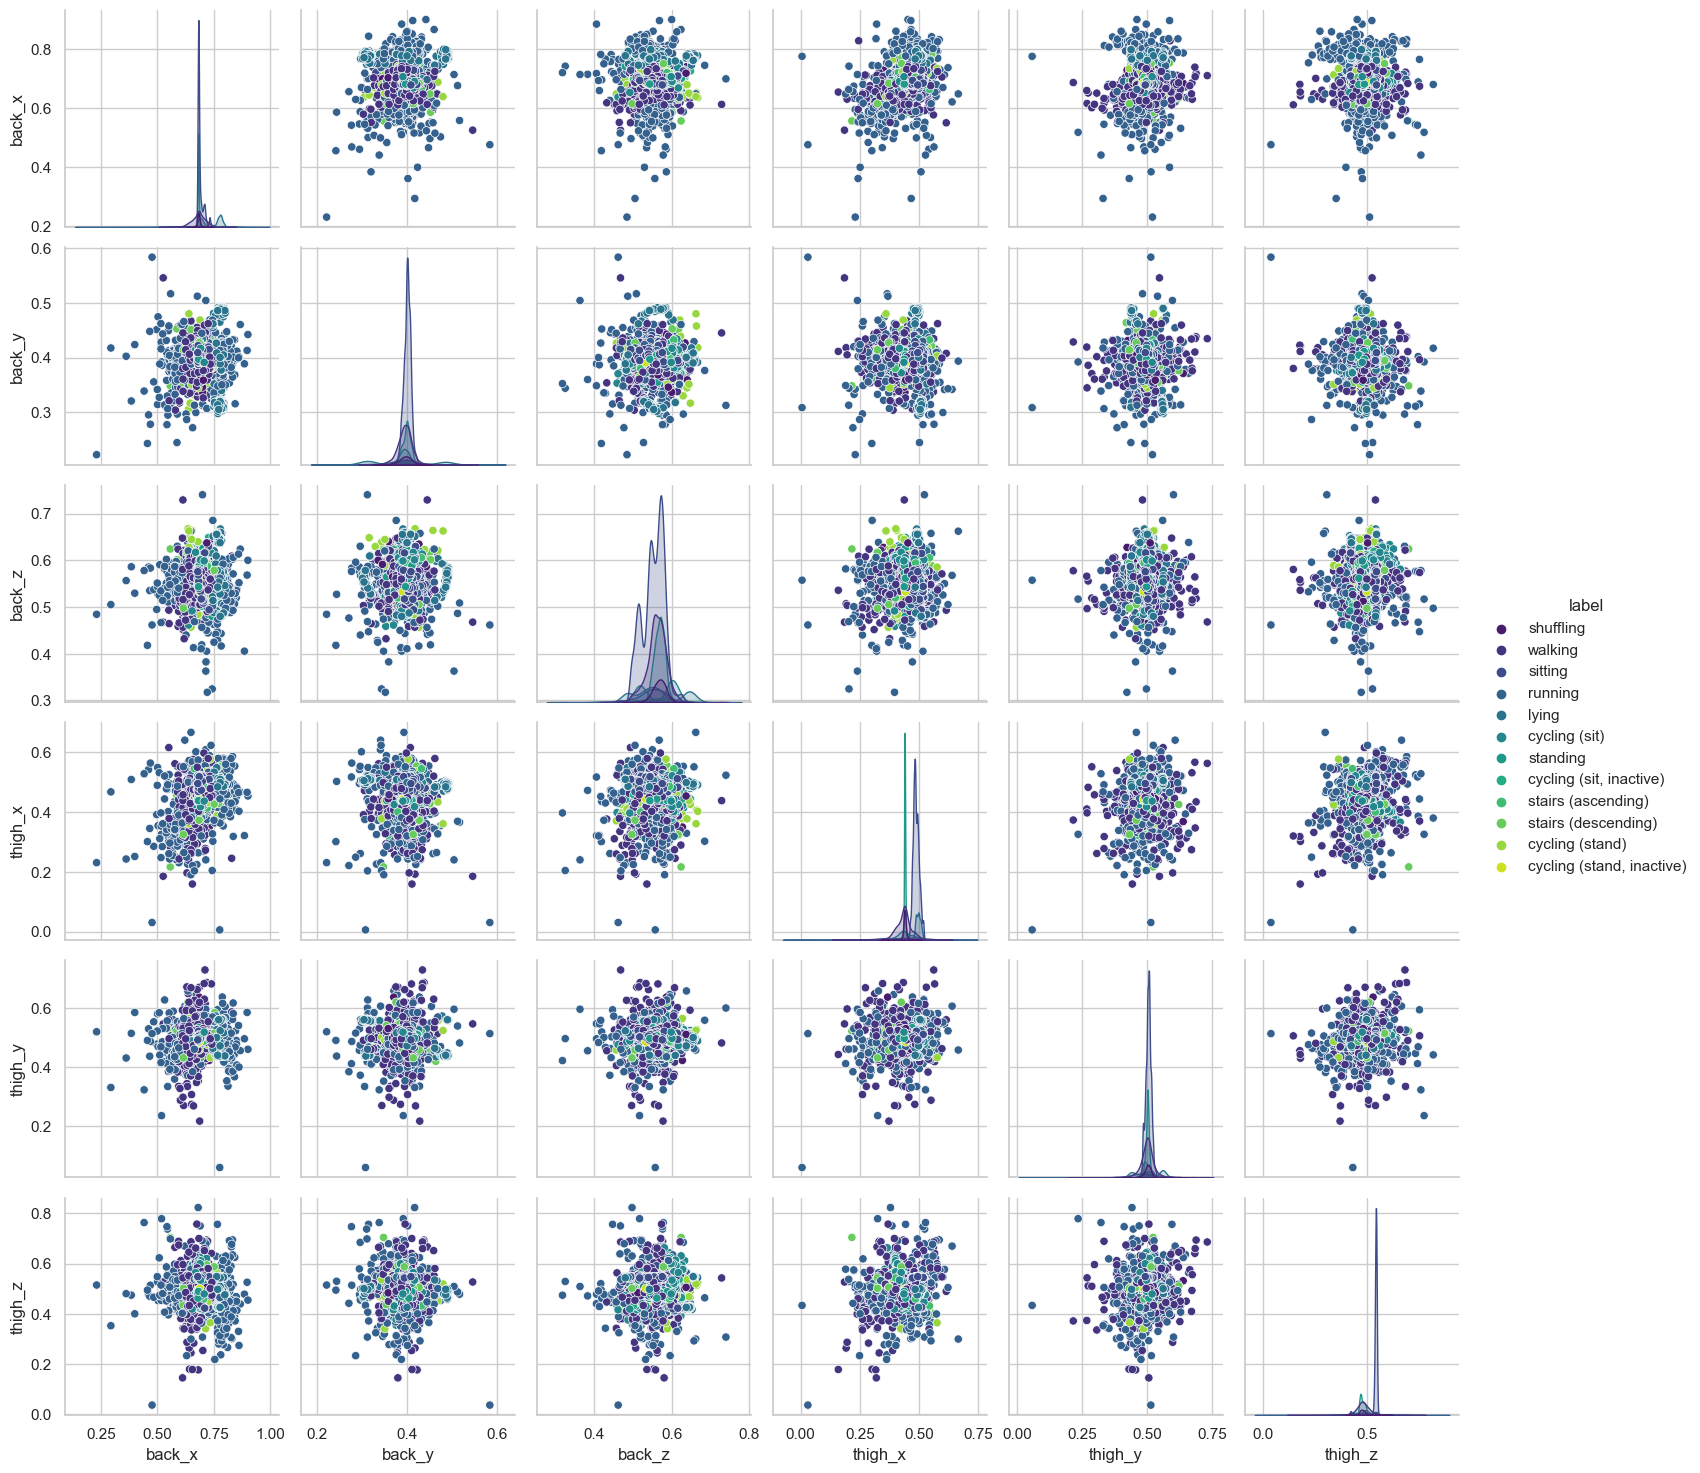

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select a smaller sample of the data
sampled_df = temp_df.sample(n=10000, random_state=42)  # Adjust the sample size as needed

# Select only the relevant columns for the pairplot
columns_of_interest = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']

# Create the pairplot
sns.pairplot(sampled_df[columns_of_interest], hue='label', palette='viridis')

# Show the plot
plt.show()


<Axes: ylabel='Frequency'>

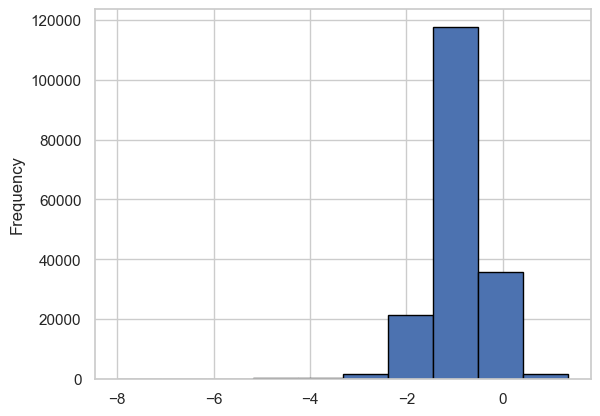

In [20]:

df['back_x'].plot.hist(edgecolor='black',bins=10)

<Axes: ylabel='Frequency'>

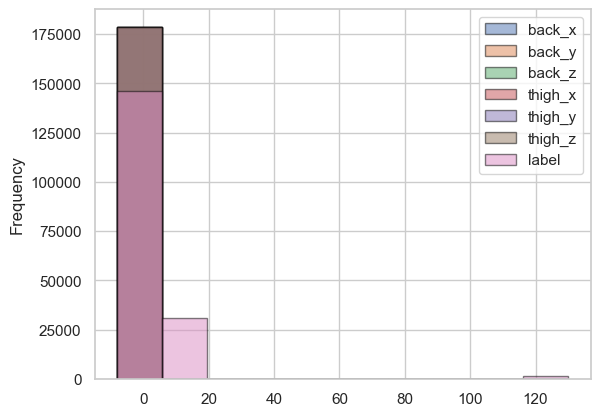

In [22]:
df.plot.hist(alpha=0.5,bins=10,edgecolor='black')

In [23]:
meanbackx=df['back_x'].mean()

### Scatter plots

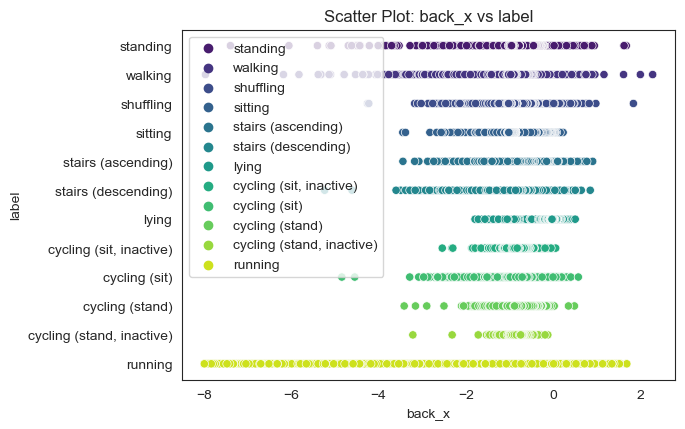

In [54]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
scat1=sns.scatterplot(data=full_df2, x='back_x', y='label', hue='label', palette='viridis')
plt.title('Scatter Plot: back_x vs label')
plt.xlabel('back_x')
plt.ylabel('label')
scat1.legend(loc='upper left')



### Box plots for various sensor data

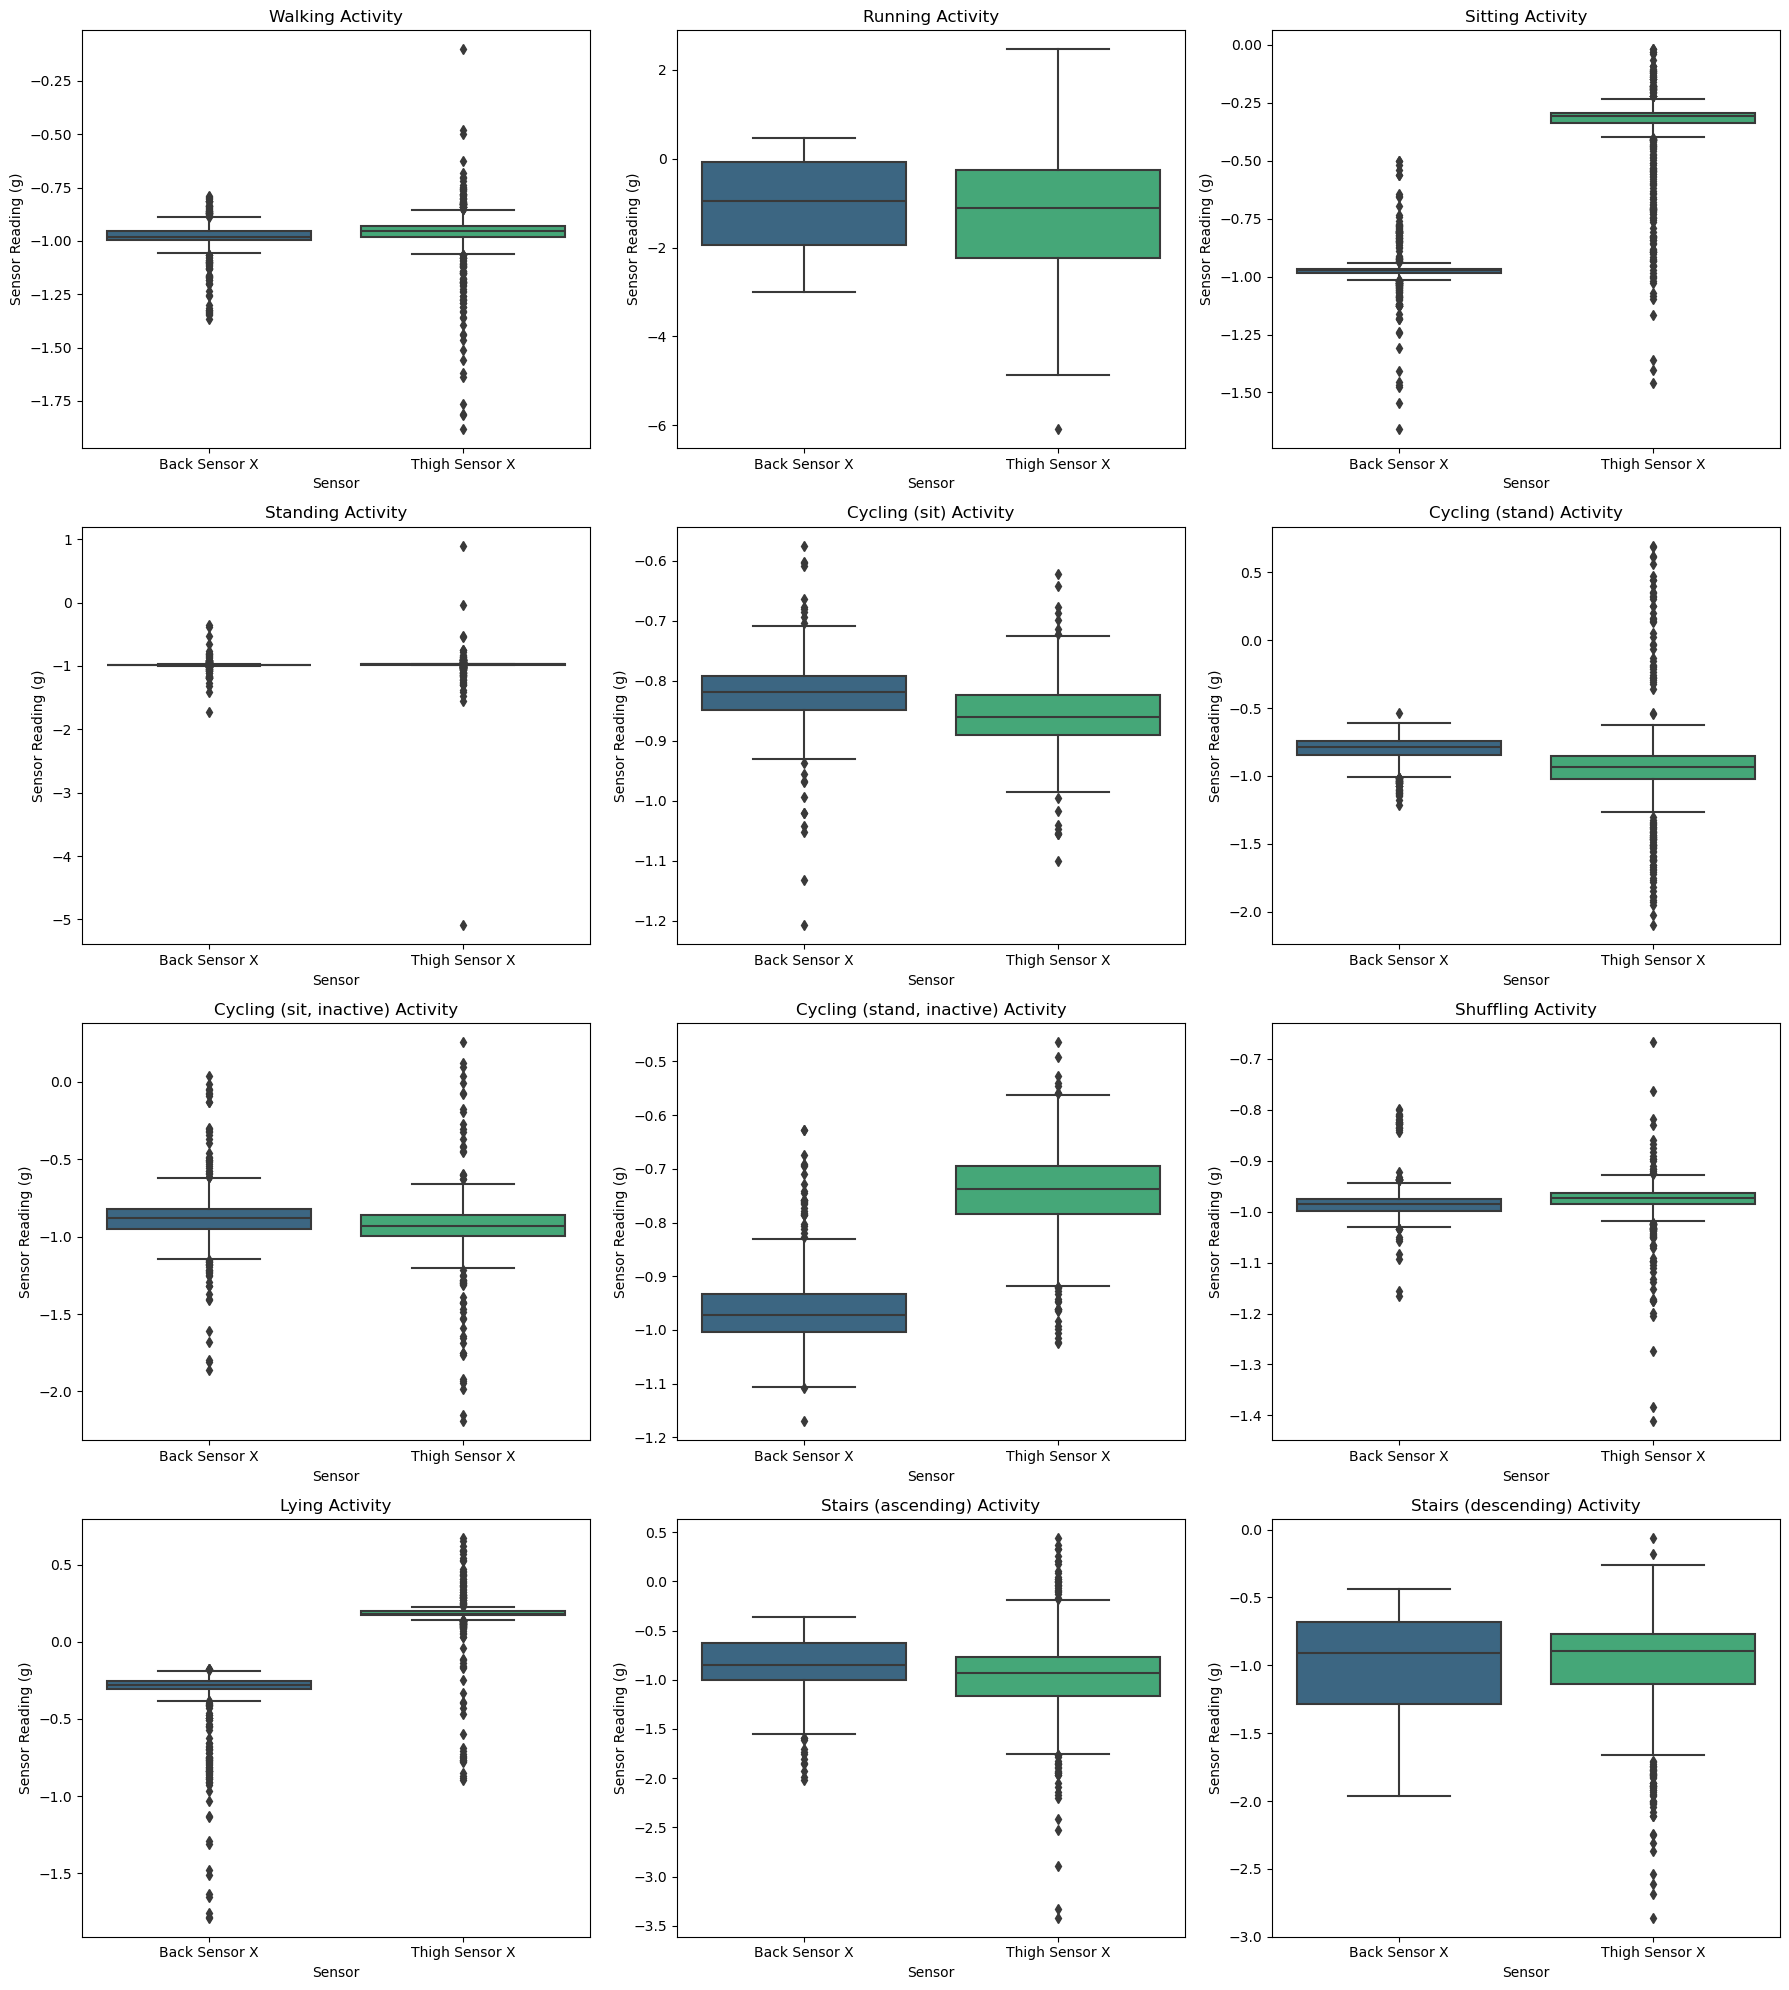

In [16]:

# Check if combined_df has the necessary columns
if all(col in full_df.columns for col in ['back_x', 'thigh_x', 'label']):
    # Create subplots
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

    # List of activities
    activity_labels = ['walking', 'running', 'sitting', 'standing', 'cycling (sit)', 'cycling (stand)',
                       'cycling (sit, inactive)', 'cycling (stand, inactive)', 'shuffling', 'lying',
                       'stairs (ascending)', 'stairs (descending)']

    # Iterate through activities
    for idx, activity in enumerate(activity_labels):
        subset_df = full_df[full_df2['label'] == activity].head(500)
        if not subset_df.empty:
            ax = axes[idx // 3, idx % 3]  # Adjusted indexing to fit all activities
            sns.boxplot(data=subset_df[['back_x', 'thigh_x']], ax=ax,palette='viridis')
            ax.set_title(f'{activity.capitalize()} Activity')
            ax.set_xlabel('Sensor')
            ax.set_ylabel('Sensor Reading (g)')
            ax.set_xticklabels(['Back Sensor X', 'Thigh Sensor X'])
        else:
            print(f"No data available for activity: {activity}")

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print("The dataframe does not have the required columns: 'back_x', 'thigh_x', 'label'")



Interpretation : The output of the provided code will generate a series of box plots, each representing the distribution of sensor readings (back_x and thigh_x) for different activities. Here's what these box plots explain:

Distribution: Each box plot shows the distribution of sensor readings for back_x and thigh_x for a specific activity.

Box: The box represents the interquartile range (IQR), which contains the middle 50% of the data.
Median: The line inside the box represents the median (50th percentile) of the data.
Whiskers: The whiskers extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles, respectively.
Outliers: Points outside the whiskers are considered outliers and are plotted individually.
Comparison Across Activities: By placing each activity's box plots in a grid, you can visually compare the sensor readings across different activities.

Variation: Activities with high variability in sensor readings will have taller boxes and longer whiskers.
Median Comparison: You can compare the median sensor readings between different activities to see if certain activities consistently produce higher or lower sensor readings.
Outliers: The presence and spread of outliers can indicate activities with inconsistent sensor readings.
Example of Interpretations from the Box Plots:
Dynamic vs. Static Activities:

Walking and Running: These dynamic activities might show higher variability (wider IQR) and potentially more outliers due to the range of movements involved.
Sitting and Standing: These static activities might show lower variability (narrower IQR) and fewer outliers.
Cycling:

Cycling (sit) vs. Cycling (stand): These can show different distributions based on the position during cycling, highlighting how sensor readings change with posture.
Other Activities:

Stairs (ascending) vs. Stairs (descending): These activities might show different median values and variability, reflecting the different dynamics of going up versus down the stairs

### Outlier Detection and Handling

Text(0.5, 1.0, 'Thigh z')

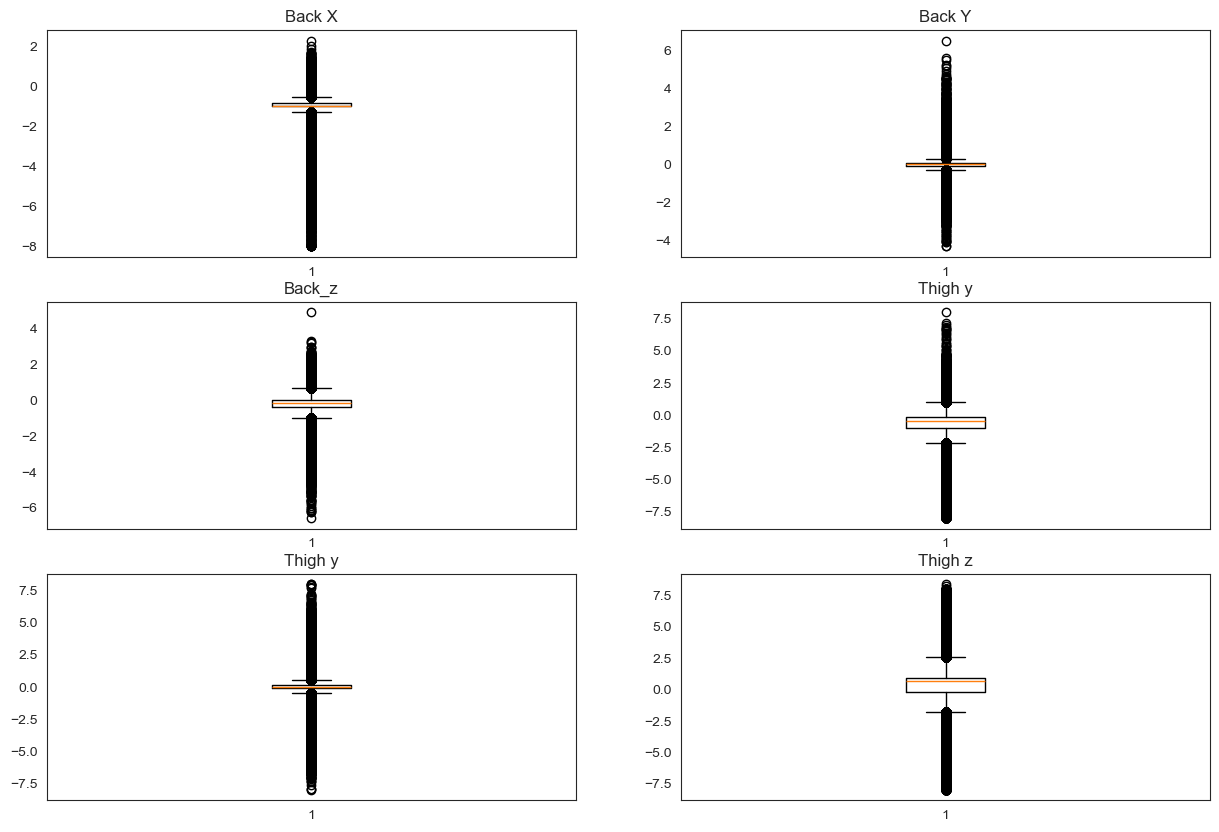

In [34]:
plt.figure(figsize = (15, 10))
sns.set_style('white')

ax=plt.subplot(321)
plt.boxplot(full_df['back_x'])
ax.set_title('Back X')

ax=plt.subplot(322)
plt.boxplot(full_df['back_y'])
ax.set_title('Back Y')

ax=plt.subplot(323)
plt.boxplot(full_df['back_z'])
ax.set_title('Back_z')

ax=plt.subplot(324)
plt.boxplot(full_df['thigh_x'])
ax.set_title('Thigh y')

ax=plt.subplot(325)
plt.boxplot(full_df['thigh_y'])
ax.set_title('Thigh y')

ax=plt.subplot(326)
plt.boxplot(full_df['thigh_z'])
ax.set_title('Thigh z')


In [35]:
from scipy import stats
# Calculate Z-scores of the data
z_scores = np.abs(stats.zscore(full_df.select_dtypes(include=[np.number])))

# Define the outlier threshold
outlier_threshold = 3

# Identify and remove outliers
outliers = (z_scores > outlier_threshold).any(axis=1)
full_df3 = full_df[(z_scores < outlier_threshold).all(axis=1)]

# Display the shape of the DataFrame before and after outlier removal
print(f"DataFrame shape before outlier removal: {full_df.shape}")
print(f"DataFrame shape after outlier removal: {full_df3.shape}")

DataFrame shape before outlier removal: (6461328, 8)
DataFrame shape after outlier removal: (5953985, 8)


### Noise Reduction and Normalisation

In [36]:
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import MinMaxScaler

# List of sensor columns to apply noise reduction and normalization because these play a major role in the prediction
sensor_columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

# Apply Gaussian filter for noise reduction
for col in sensor_columns:
    full_df[col + '_smoothed'] = gaussian_filter1d(full_df[col], sigma=2)

# Normalize data to have a consistent scale across different sensors
scaler = MinMaxScaler()
full_df[sensor_columns] = scaler.fit_transform(full_df[sensor_columns])

for col in sensor_columns:
    full_df2[col + '_smoothed'] = gaussian_filter1d(full_df2[col], sigma=2)

# Normalize data to have a consistent scale across different sensors
scaler = MinMaxScaler()
full_df2[sensor_columns] = scaler.fit_transform(full_df2[sensor_columns])

### Data Segmentation

In [37]:
# Segmenting the data into fixed-size windows with overlap
def segment_data(data, window_size, overlap):
    segments = []
    step = int(window_size * (1 - overlap))
    for start in range(0, len(data) - window_size + 1, step):
        segment = data[start:start + window_size]
        segments.append(segment)
    return np.array(segments)

window_size = 100  # it is just an example we can modify this as we wish
overlap = 0.5  # 50% overlap
segmented_data = segment_data(full_df.values, window_size, overlap)

### Time Series Evaluation

#### Sensor readings of back_x and thigh_x over time

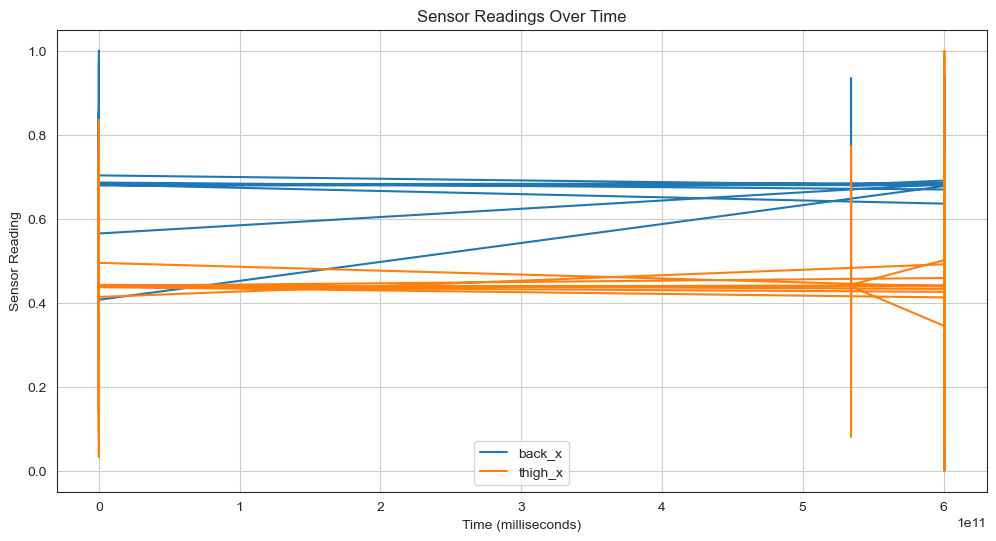

In [38]:
full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])

# Calculate timedelta in milliseconds
full_df['timedelta_ms'] = (full_df['timestamp'] - full_df['timestamp'].min()).dt.total_seconds() * 1000

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(full_df['timedelta_ms'], full_df['back_x'], label='back_x')
plt.plot(full_df['timedelta_ms'], full_df['thigh_x'], label='thigh_x')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

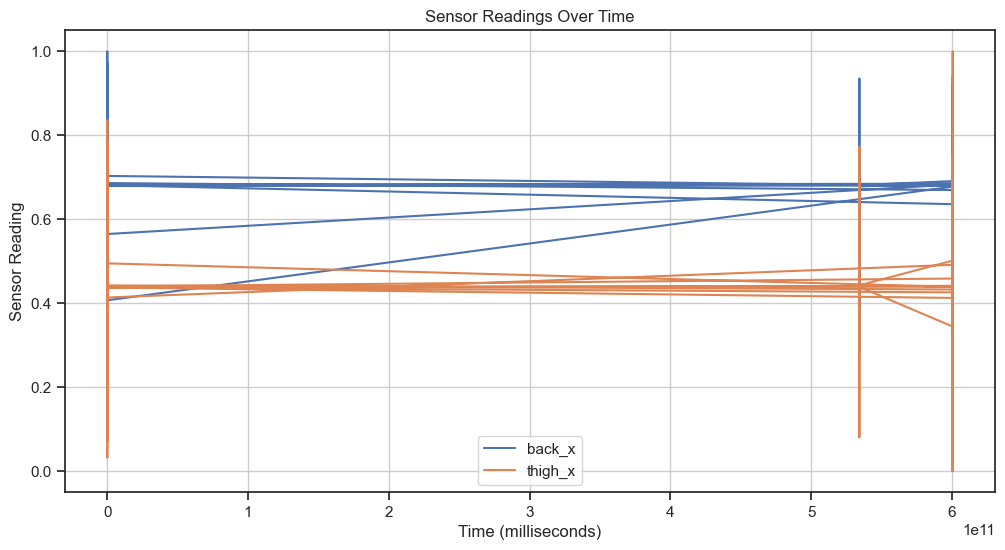

In [38]:
full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])

# Calculate timedelta in milliseconds
full_df['timedelta_ms'] = (full_df['timestamp'] - full_df['timestamp'].min()).dt.total_seconds() * 1000

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(full_df['timedelta_ms'], full_df['back_x'], label='back_x')
plt.plot(full_df['timedelta_ms'], full_df['thigh_x'], label='thigh_x')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

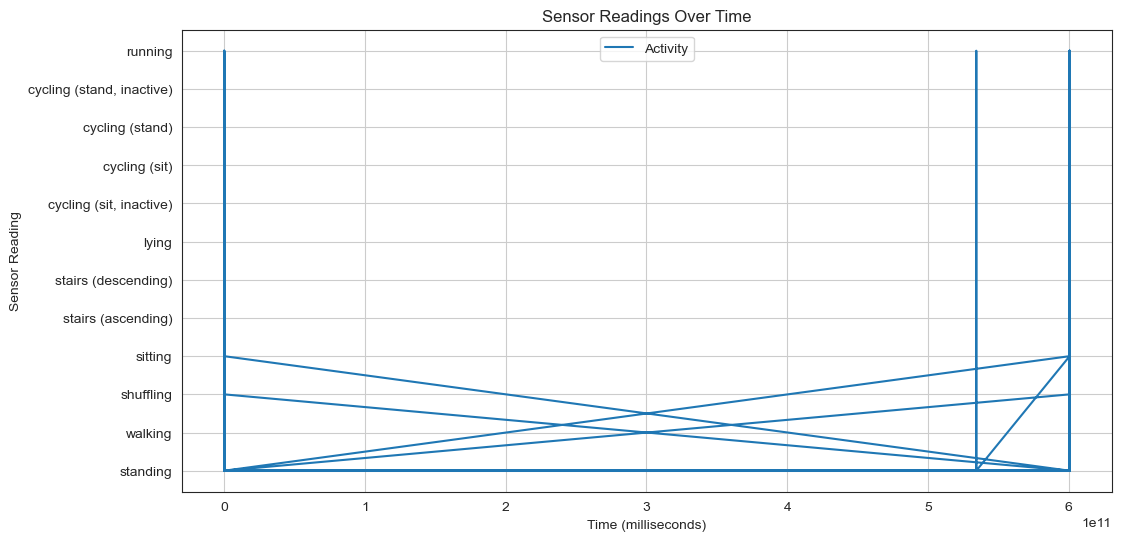

In [40]:

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(full_df['timedelta_ms'], full_df['label'], label='Activity')
#plt.plot(df['timedelta_ms'], df['thigh_x'], label='thigh_x')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()



### Sensor readings for each activity over time

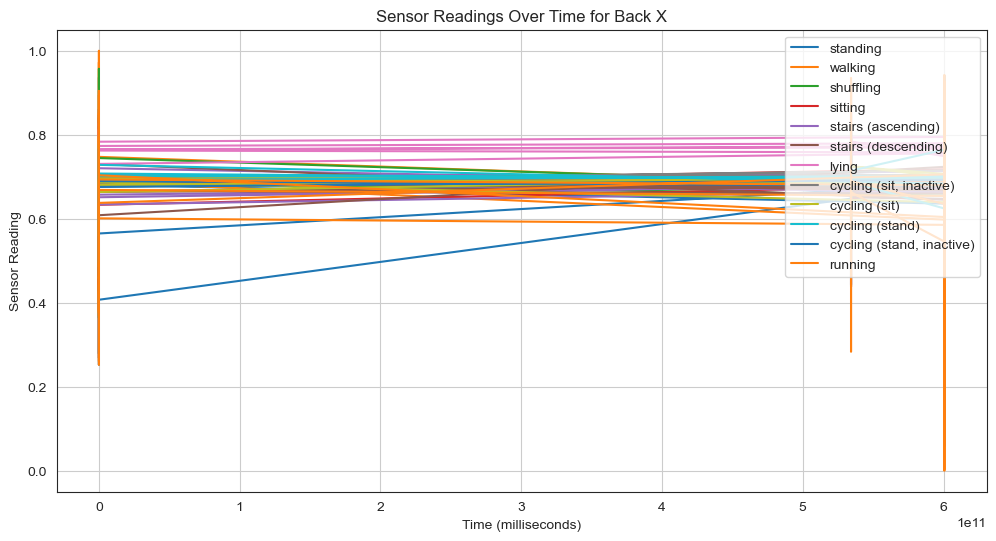

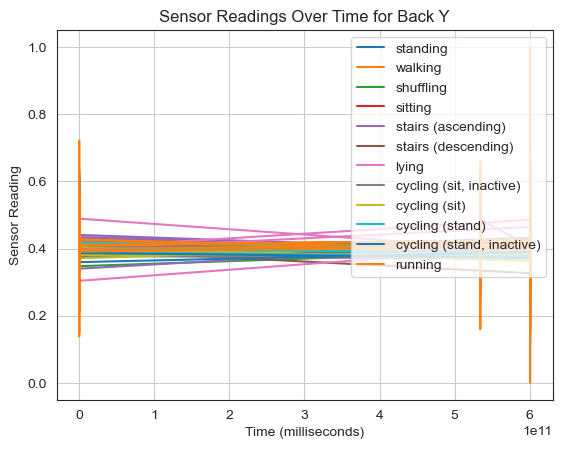

In [41]:

# Unique activities in the label column
activities = full_df['label'].unique()

plt.figure(figsize=(12, 6))

# Plot each activity with a different color
for activity in activities:
    activity_data = full_df[full_df['label'] == activity]
    plt.plot(activity_data['timedelta_ms'], activity_data['back_x'], label=activity)

plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time for Back X')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot each activity with a different color
for activity in activities:
    activity_data = full_df[full_df['label'] == activity]
    plt.plot(activity_data['timedelta_ms'], activity_data['back_y'], label=activity)

plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time for Back Y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


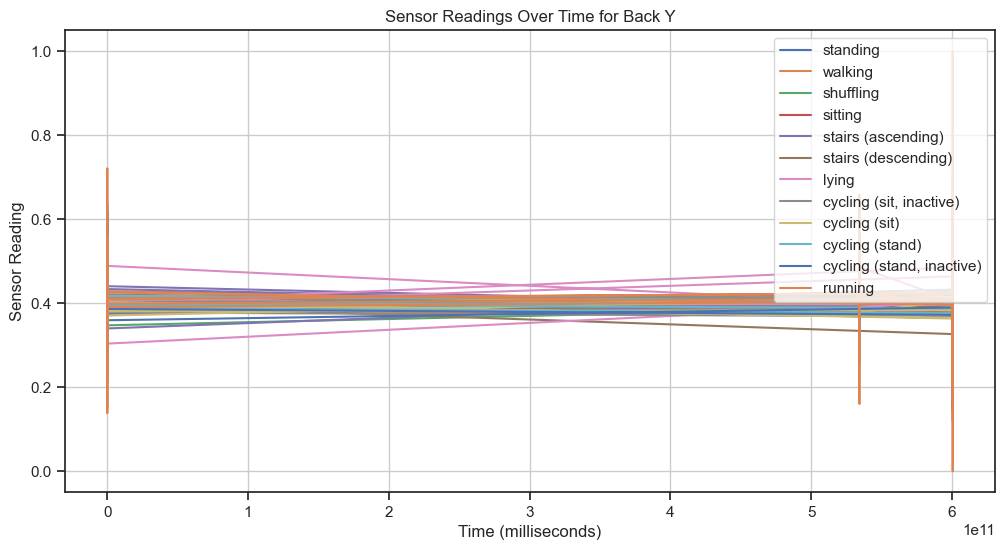

In [52]:
plt.figure(figsize=(12, 6))
# Plot each activity with a different color
for activity in activities:
    activity_data = full_df[full_df['label'] == activity]
    plt.plot(activity_data['timedelta_ms'], activity_data['back_y'], label=activity)

plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time for Back Y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

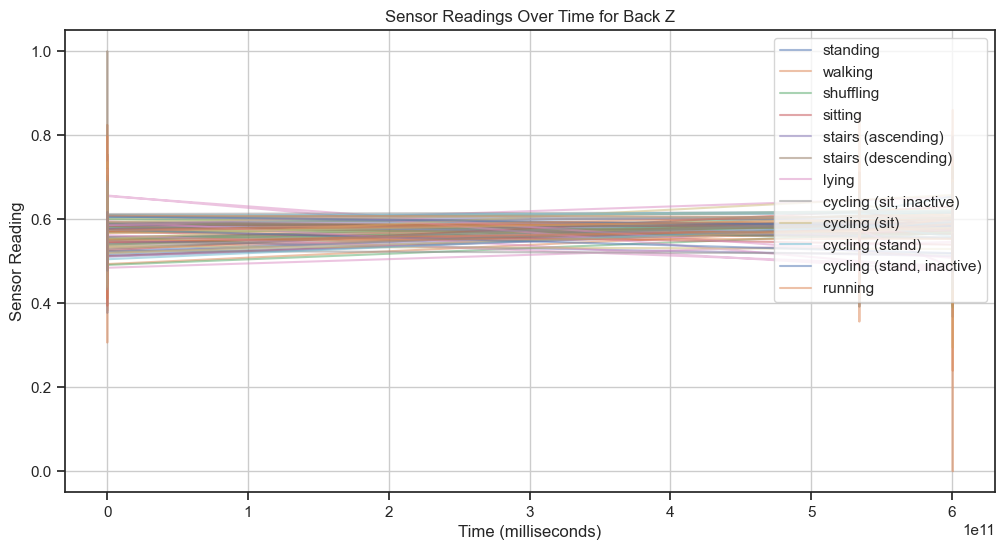

In [55]:
plt.figure(figsize=(12, 6))
# Plot each activity with a different color
for activity in activities:
    activity_data = full_df[full_df['label'] == activity]
    plt.plot(activity_data['timedelta_ms'], activity_data['back_z'], label=activity,alpha=0.5)

plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time for Back Z')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

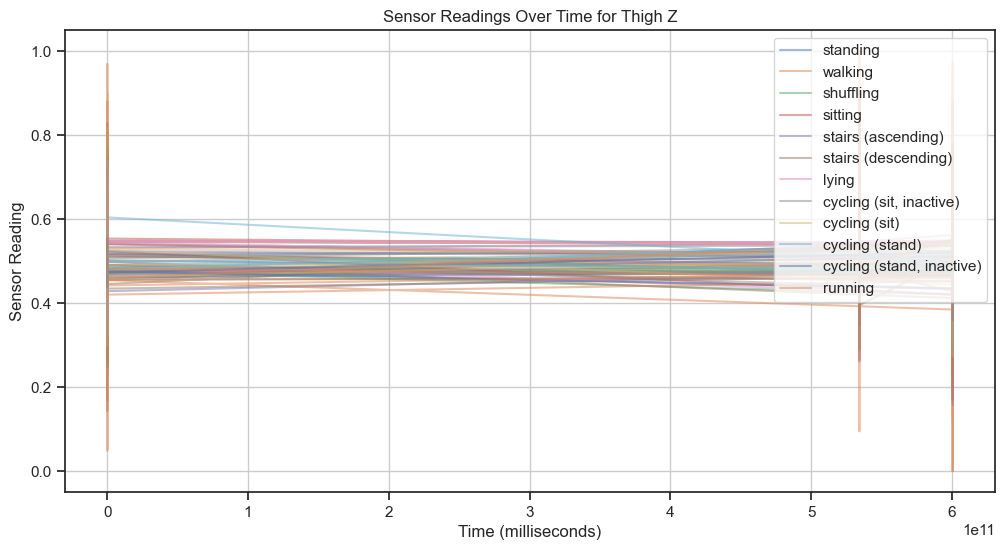

In [59]:
plt.figure(figsize=(12, 6))
# Plot each activity with a different color
for activity in activities:
    activity_data = full_df[full_df['label'] == activity]
    plt.plot(activity_data['timedelta_ms'], activity_data['thigh_z'], label=activity,alpha=0.5)

plt.xlabel('Time (milliseconds)')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time for Thigh Z')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()